<a href="https://colab.research.google.com/github/rdgnoleto/Transfer_Learning_.ipynb/blob/main/Transfer_Learning_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregar o dataset
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

num_classes = ds_info.features['label'].num_classes
img_size = (224, 224)

In [4]:
# Pré-processamento
def preprocess(image, label):
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image, tf.one_hot(label, num_classes)

In [5]:
# Aplicar pré-processamento
batch_size = 32

ds_train = ds_train.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [6]:
# Construir o modelo CNN simples
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    11,075,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,104,994 (42.36 MB)

 Trainable params: 11,104,994 (42.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Treinamento
history = model.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1295s 3s/step - accuracy: 0.5984 - loss: 0.7446 - val_accuracy: 0.7069 - val_loss: 0.5563
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1294s 3s/step - accuracy: 0.7017 - loss: 0.5716 - val_accuracy: 0.7244 - val_loss: 0.5215
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1298s 3s/step - accuracy: 0.7624 - loss: 0.4927 - val_accuracy: 0.7828 - val_loss: 0.4563
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1282s 3s/step - accuracy: 0.8066 - loss: 0.4232 - val_accuracy: 0.7934 - val_loss: 0.4516
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1331s 3s/step - accuracy: 0.8374 - loss: 0.3679 - val_accuracy: 0.7900 - val_loss: 0.4522
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1278s 3s/step - accuracy: 0.8618 - loss: 0.3237 - val_accuracy: 0.8066 - val_loss: 0.4478
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1196s 2s/step - accuracy: 0.8854 - loss: 0.2656 - val_accuracy: 0.8011 - val_loss: 0.4712
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1194s 2s/step - accuracy: 0.9114 - loss: 0.2262 - 

In [8]:
# Avaliação
loss, accuracy = model.evaluate(ds_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 87s 777ms/step - accuracy: 0.8145 - loss: 0.5565
Test Loss: 0.5456, Test Accuracy: 0.8131


Text(0.5, 0, 'Epochs')

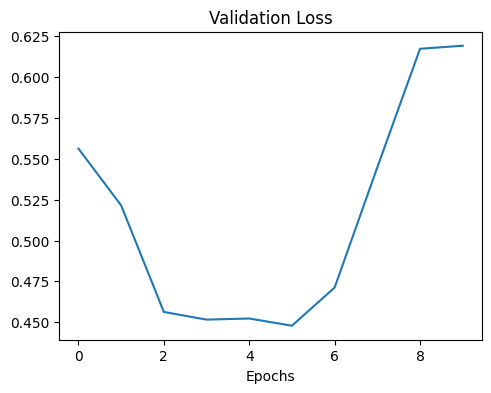

In [9]:
# Plot resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.xlabel("Epochs")

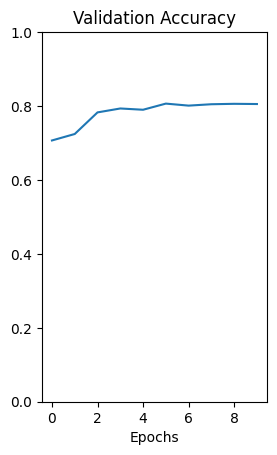

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylim(0, 1)
plt.show()

In [12]:
from google.colab import files
uploaded = files.upload()

Saving 000.webp to 000.webp


In [15]:
def testar_imagem(model, img_path, class_names):
    from tensorflow.keras.preprocessing import image
    import matplotlib.pyplot as plt

    # Carregar e pré-processar imagem
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = tf.cast(img_array, tf.float32) / 255.0
    img_array = tf.expand_dims(img_array, 0)

    # Fazer predição
    pred = model.predict(img_array)
    pred_label = tf.argmax(pred[0]).numpy()
    confianca = tf.reduce_max(pred[0]).numpy()

    # Mostrar imagem com predição
    plt.imshow(img)
    plt.title(f"Predição: {class_names[pred_label]} ({confianca:.2%})")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


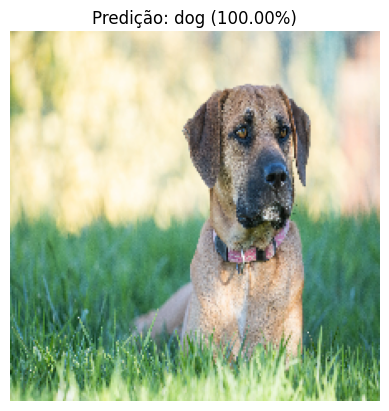

In [16]:
testar_imagem(model, '000.webp', ds_info.features['label'].names)

In [18]:
import urllib.request

url = "https://blog-static.petlove.com.br/wp-content/uploads/2020/10/Gato-ansiedade-Petlove.jpg"  # substitua pela URL da imagem
filename = "imagem_teste.jpg"
urllib.request.urlretrieve(url, filename)
print(f"Imagem salva como {filename}")

Imagem salva como imagem_teste.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


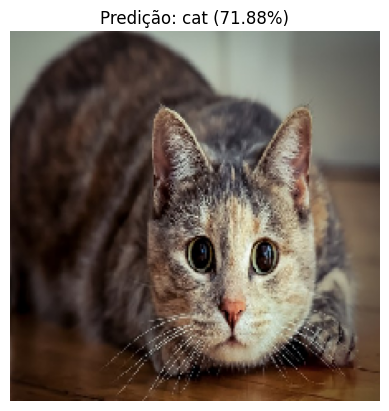

In [19]:
testar_imagem(model, "imagem_teste.jpg", ds_info.features['label'].names)